In [1]:
## mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.dummy import DummyRegressor

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [34]:
import matplotlib.style as style
style.use('seaborn-poster')


In [3]:
pred_dt_train = pd.read_csv('drive/MyDrive/Hotel-Room-Price-Estimation/Cache/Prediction_dt_train.csv')
pred_dt_simp_train = pd.read_csv('drive/MyDrive/Hotel-Room-Price-Estimation/Cache/Prediction_dt_simp_train.csv')
pred_rf_train = pd.read_csv('drive/MyDrive/Hotel-Room-Price-Estimation/Cache/Prediction_rf_train.csv')
pred_gbr_train = pd.read_csv('drive/MyDrive/Hotel-Room-Price-Estimation/Cache/Prediction_gbr_train.csv')
pred_xgb_train = pd.read_csv('drive/MyDrive/Hotel-Room-Price-Estimation/Cache/Prediction_xgb_train.csv')

pred_dt_test = pd.read_csv('drive/MyDrive/Hotel-Room-Price-Estimation/Cache/Prediction_dt_test.csv')
pred_dt_simp_test = pd.read_csv('drive/MyDrive/Hotel-Room-Price-Estimation/Cache/Prediction_dt_simp_test.csv')
pred_rf_test = pd.read_csv('drive/MyDrive/Hotel-Room-Price-Estimation/Cache/Prediction_rf_test.csv')
pred_gbr_test = pd.read_csv('drive/MyDrive/Hotel-Room-Price-Estimation/Cache/Prediction_gbr_test.csv')
pred_xgb_test = pd.read_csv('drive/MyDrive/Hotel-Room-Price-Estimation/Cache/Prediction_xgb_test.csv')

In [4]:
df = pd.read_csv('drive/MyDrive/Hotel-Room-Price-Estimation/Data/df_final_new.csv')

# extract the feature and target from the dataset
X_dev = df.loc[:, df.columns != 'price']
y_dev = np.log(df.loc[:, df.columns == 'price'])

X_train, X_test, y_train, y_test = train_test_split(X_dev, 
                                                    y_dev, 
                                                    test_size=0.2,  
                                                    random_state=123)


In [5]:
dummy_regr = DummyRegressor(strategy="median")

dummy_regr.fit(X_train, y_train)


In [11]:
train_mae_dummy = mean_absolute_error(y_train, dummy_regr.predict(X_train))
test_mae_dummy = mean_absolute_error(y_test, dummy_regr.predict(X_test))

train_dt = mean_absolute_error(y_train, pred_dt_train)
test_dt = mean_absolute_error(y_test, pred_dt_test)

train_dt_simp = mean_absolute_error(y_train, pred_dt_simp_train)
test_dt_simp = mean_absolute_error(y_test, pred_dt_simp_test)

train_rf = mean_absolute_error(y_train, pred_rf_train)
test_rf = mean_absolute_error(y_test, pred_rf_test)

train_gbr = mean_absolute_error(y_train, pred_gbr_train)
test_gbr = mean_absolute_error(y_test, pred_gbr_test)

train_xgb = mean_absolute_error(y_train, pred_xgb_train)
test_xgb = mean_absolute_error(y_test, pred_xgb_test)

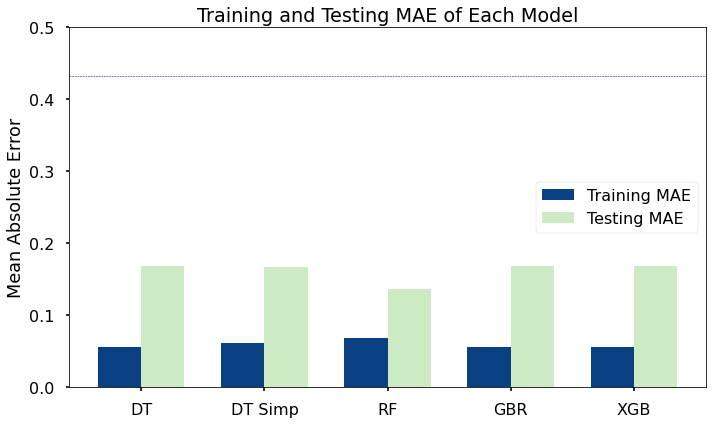

In [37]:
labels = ['DT', 'DT Simp', 'RF', 'GBR', 'XGB']
train_mae = [train_dt, train_dt_simp, train_rf, train_gbr, train_xgb]
test_mae = [test_dt, test_dt_simp, test_rf, test_gbr, test_xgb]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (10,6))
rects1 = ax.bar(x - width/2, train_mae, width, label='Training MAE',color = '#084081')
rects2 = ax.bar(x + width/2, test_mae, width, label='Testing MAE', color = '#ccebc5')

ax.set_ylim([0, 0.5])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean Absolute Error')
ax.set_title('Training and Testing MAE of Each Model')

labels = ['','DT', 'DT Simp', 'RF', 'GBR', 'XGB']
ax.set_xticklabels(labels, fontdict=None)
ax.legend()

ax.axhline(y=train_mae_dummy,color='navy',linewidth=0.5,linestyle='--')

fig.tight_layout()

plt.show()

In [38]:
train_dt = r2_score(y_train, pred_dt_train)
test_dt = r2_score(y_test, pred_dt_test)

train_dt_simp = r2_score(y_train, pred_dt_simp_train)
test_dt_simp = r2_score(y_test, pred_dt_simp_test)

train_rf = r2_score(y_train, pred_rf_train)
test_rf = r2_score(y_test, pred_rf_test)

train_gbr = r2_score(y_train, pred_gbr_train)
test_gbr = r2_score(y_test, pred_gbr_test)

train_xgb = r2_score(y_train, pred_xgb_train)
test_xgb = r2_score(y_test, pred_xgb_test)

In [39]:
train_r_dummy = r2_score(y_train, dummy_regr.predict(X_train))
test_r_dummy = r2_score(y_test, dummy_regr.predict(X_test))

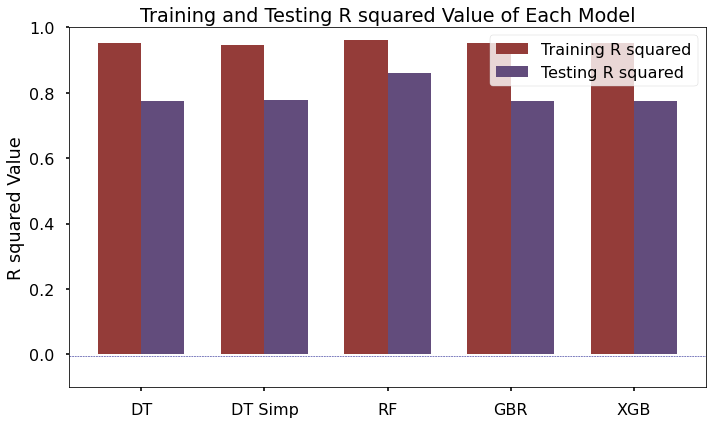

In [42]:
labels = ['DT', 'DT Simp', 'RF', 'GBR', 'XGB']
train_mae = [train_dt, train_dt_simp, train_rf, train_gbr, train_xgb]
test_mae = [test_dt, test_dt_simp, test_rf, test_gbr, test_xgb]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (10,6))
rects1 = ax.bar(x - width/2, train_mae, width, label='Training R squared',color = '#943c39')
rects2 = ax.bar(x + width/2, test_mae, width, label='Testing R squared', color = '#624c7c')

ax.set_ylim([-0.1, 1])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('R squared Value')
ax.set_title('Training and Testing R squared Value of Each Model')

labels = ['','DT', 'DT Simp', 'RF', 'GBR', 'XGB']
ax.set_xticklabels(labels, fontdict=None)
ax.legend()

ax.axhline(y=train_r_dummy,color='navy',linewidth=0.5,linestyle='--')

fig.tight_layout()

plt.show()

In [101]:
def plot_results(result,name,r,mae):

  train_mae_ls = list(result['Train_Mae'])
  test_mae_ls = list(result['Test_Mae'])
  train_rsq_ls = list(result['Train_R'])
  test_rsq_ls = list(result['Test_R'])

  x = range(10, X_dev.shape[1]-5)  

  fig, ax = plt.subplots(2, sharex='col', sharey='row',figsize = [6,10])
  title = 'Performance of '+name
  fig.suptitle(title,fontsize=18)
  #fig.suptitle('Performance of '+name)

  ax[0].plot(x, train_mae_ls,label = 'Training MAE', color = '#c97937')
  ax[0].plot(x, test_mae_ls,label = 'Testing MAE', color = '#7d9847')
  ax[0].axhline(y=mae,color='navy',linewidth=0.5,linestyle='--')
  ax[0].set_title('Mean Absolute Error of Training and Testing Dataset',fontdict = {'fontsize':12})
  ax[0].set_ylabel('MAE')
  # ax[0].set_xlabel('N_Components')
  ax[0].set_ylim([0, 0.5])
  ax[0].legend()

  ax[1].plot(x, train_rsq_ls,label = 'Training R Square',color = '#9c403d')
  ax[1].plot(x, test_rsq_ls,label = 'Testing R Square',color = '#3f6899')
  ax[1].axhline(y=r,color='navy',linewidth=0.5,linestyle='--')
  ax[1].set_title('R Square value of Training and Testing Dataset',fontdict = {'fontsize':12})
  ax[1].set_ylabel('R Square')
  ax[1].set_xlabel('N_Components')
  ax[1].set_ylim([-0.2, 1])
  ax[1].legend()

  plt.show()

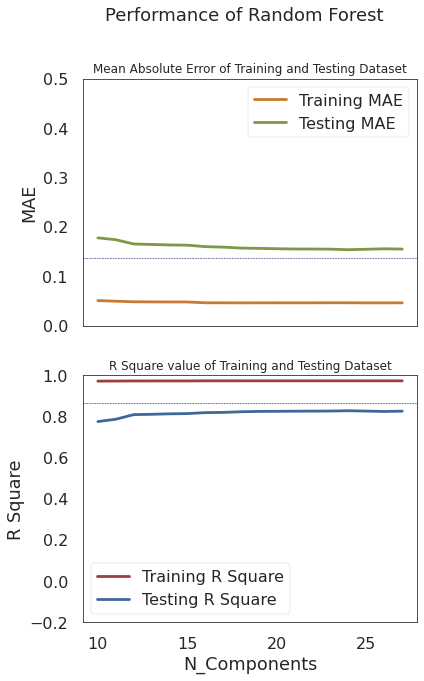

In [102]:
result_rf = pd.read_csv('drive/MyDrive/Hotel-Room-Price-Estimation/Cache/RF_Results.csv')
plot_results(result_rf,"Random Forest", r2_score(y_test, pred_rf_test), mean_absolute_error(y_test, pred_rf_test))


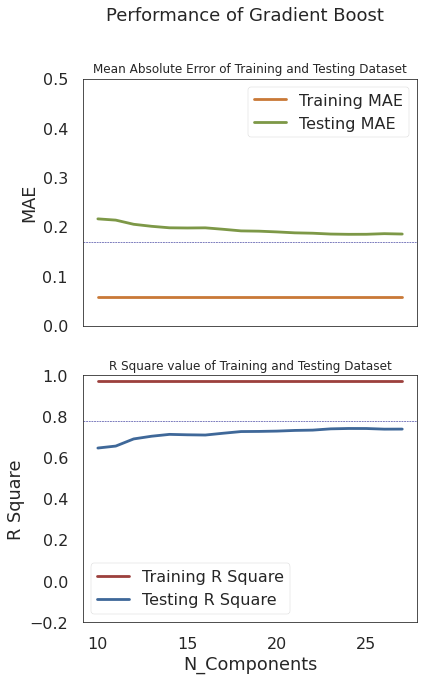

In [103]:

result_gbr = pd.read_csv('drive/MyDrive/Hotel-Room-Price-Estimation/Cache/GBR_Results.csv')
plot_results(result_gbr,"Gradient Boost",r2_score(y_test, pred_gbr_test), mean_absolute_error(y_test, pred_gbr_test))



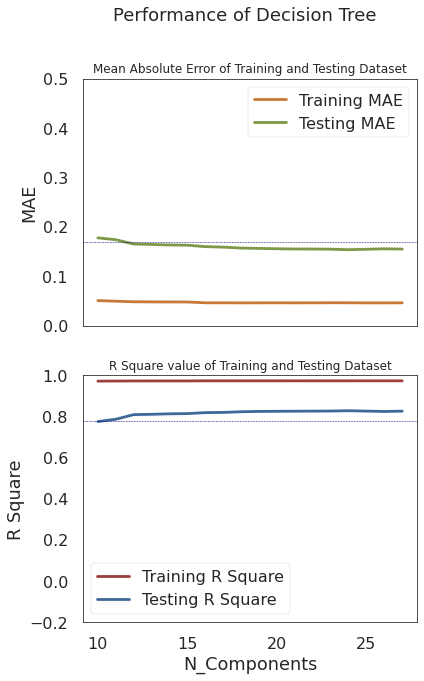

In [105]:
result_dt = pd.read_csv('drive/MyDrive/Hotel-Room-Price-Estimation/Cache/DT_Results.csv')
plot_results(result_rf,"Decision Tree",r2_score(y_test, pred_dt_test), mean_absolute_error(y_test, pred_dt_test))

In [94]:
nn1_history = pd.read_csv('drive/MyDrive/Hotel-Room-Price-Estimation/Cache/NN1_Results.csv')
nn2_history = pd.read_csv('drive/MyDrive/Hotel-Room-Price-Estimation/Cache/NN2_Results.csv')

In [107]:
nn1_train = list(nn1_history['loss'])
nn1_test = list(nn1_history['val_loss'])

nn2_train = list(nn2_history['loss'])
nn2_test = list(nn2_history['val_loss'])

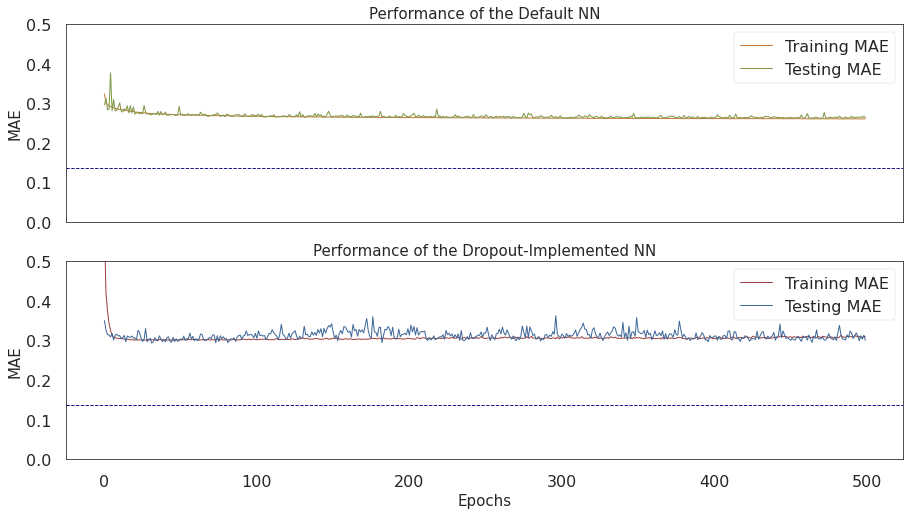

In [116]:
  x = range(500)  

  fig, ax = plt.subplots(2, sharex='col', sharey='row',figsize = [15,8])
  # fig.suptitle(title,fontsize=18)

  ax[0].plot(x, nn1_train,label = 'Training MAE', color = '#c97937',linewidth=1,)
  ax[0].plot(x, nn1_test,label = 'Testing MAE', color = '#7d9847',linewidth=1,)
  ax[0].axhline(y=mean_absolute_error(y_test, pred_rf_test),color='navy',linewidth=0.9,linestyle='--')
  ax[0].set_title('Performance of the Default NN',fontdict = {'fontsize':15})
  ax[0].set_ylabel('MAE',fontdict = {'fontsize':15})
  # ax[0].set_xlabel('N_Components')
  ax[0].set_ylim([0, 0.5])
  ax[0].legend()

  ax[1].plot(x, nn2_train,label = 'Training MAE',color = '#9c403d',linewidth=1,)
  ax[1].plot(x, nn2_test,label = 'Testing MAE',color = '#3f6899',linewidth=1,)
  ax[1].axhline(y=mean_absolute_error(y_test, pred_rf_test),color='navy',linewidth=0.9,linestyle='--')
  ax[1].set_title('Performance of the Dropout-Implemented NN',fontdict = {'fontsize':15})
  ax[1].set_ylabel('MAE',fontdict = {'fontsize':15})
  ax[1].set_xlabel('Epochs',fontdict = {'fontsize':15})
  ax[1].set_ylim([0, 0.5])
  ax[1].legend()

  plt.show()

In [134]:
mean_absolute_error(y_test, pred_rf_test)

0.13649277743169433

In [73]:
dt_feature_importance = pd.read_csv('drive/MyDrive/Hotel-Room-Price-Estimation/Cache/Feature_Importance_dt.csv')
dt_simp_feature_importance = pd.read_csv('drive/MyDrive/Hotel-Room-Price-Estimation/Cache/Feature_Importance_dt_simp.csv')
rf_feature_importance = pd.read_csv('drive/MyDrive/Hotel-Room-Price-Estimation/Cache/Feature_Importance_rf.csv')
gbr_feature_importance = pd.read_csv('drive/MyDrive/Hotel-Room-Price-Estimation/Cache/Feature_Importance_gbr.csv')
xgb_feature_importance = pd.read_csv('drive/MyDrive/Hotel-Room-Price-Estimation/Cache/Feature_Importance_xgb.csv')

In [143]:
def plot_feature_importance(df,name):
  title = "Feature Importance of "+name
  plt.figure(figsize = (16,6))
  sns.set_theme(style="whitegrid")
  tips = sns.load_dataset("tips")
  ax = sns.barplot(x='Feature Name', 
                   y='Feature Importance', 
                   data=df,
                   palette="mako")

  ax.set_ylim([0,0.4])
  ax.set(title=title)


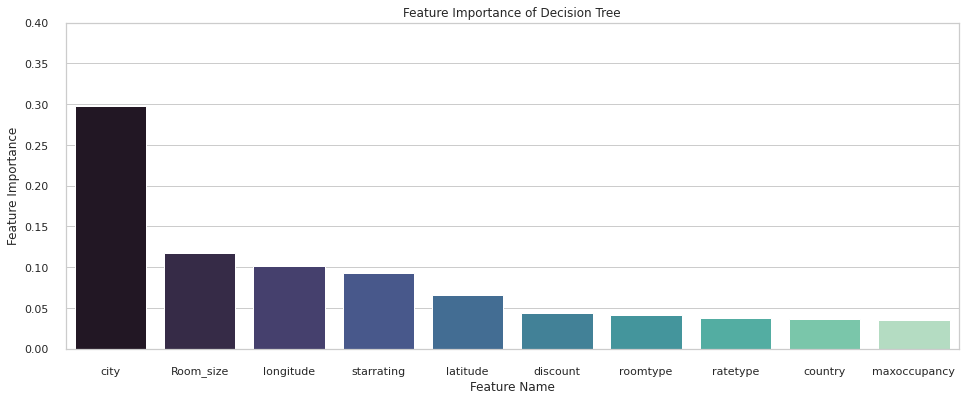

In [144]:
plot_feature_importance(dt_feature_importance,"Decision Tree")

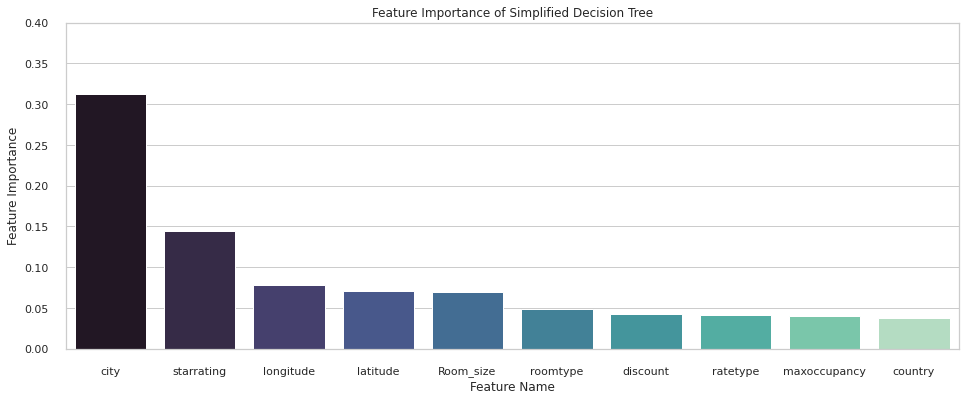

In [145]:
plot_feature_importance(dt_simp_feature_importance,"Simplified Decision Tree")

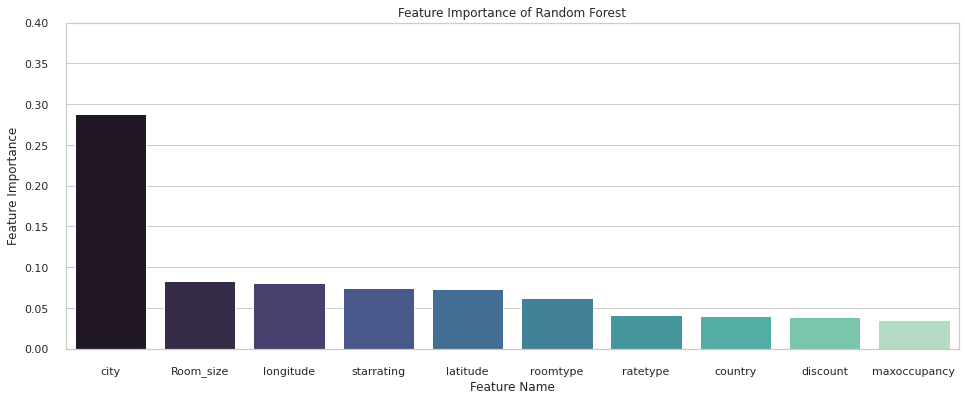

In [146]:
plot_feature_importance(rf_feature_importance,"Random Forest")

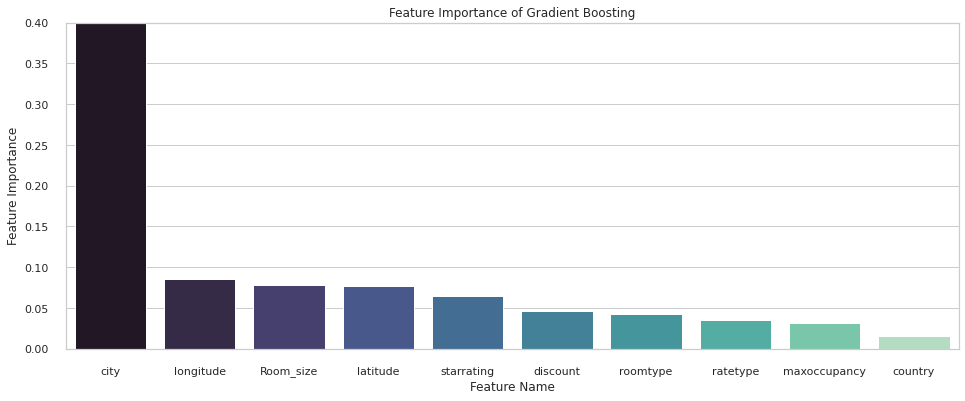

In [148]:
plot_feature_importance(gbr_feature_importance,"Gradient Boosting")

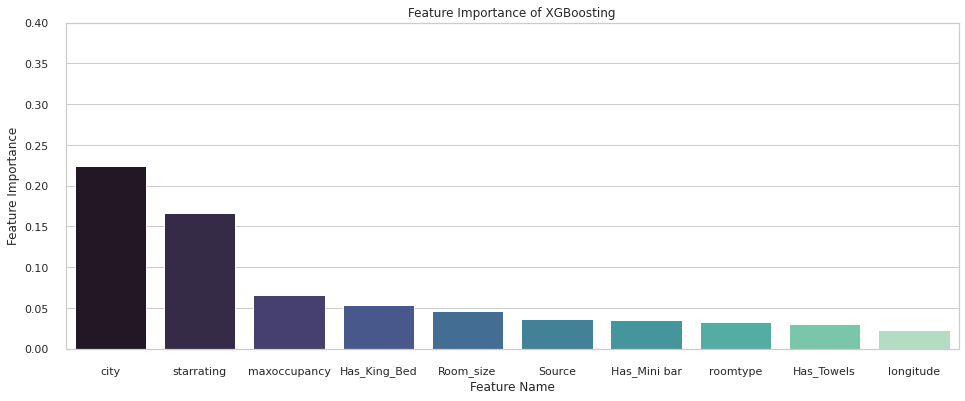

In [149]:
plot_feature_importance(xgb_feature_importance,"XGBoosting")